# 1. EDA

1.1. Скачиваем датасет, смотрим на него.

In [61]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [81]:
# загружаем данные
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tasks/data.csv', index_col=0)
df.sample(7)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                          
911296202         M       27.420         26.27          186.90     2501.0   
8712766           M       17.470         24.68          116.10      984.6   
84862001          M       16.130         20.68          108.10      798.8   
861597            B       12.360         21.80           79.78      466.1   
906616            B       11.610         16.02           75.46      408.2   
907367            B       10.030         21.28           63.19      307.3   
907145            B        9.742         19.12           61.93      289.7   

           smoothness_mean  compactness_mean  concavity_mean  \
id                                                             
911296202          0.10840           0.19880        0.363500   
8712766            0.10490           0.16030        0.215900   
84862001           0.11700           0.20220        0.172200   
861597             0.08772           0.09445        0.060150   
906616             0.10880           0.11680        0.070970   
907367             0.08117           0.03912        0.002470   
907145             0.10750           0.08333        0.008934   

           concave points_mean  symmetry_mean  ...  texture_worst  \
id                                             ...                  
911296202             0.168900         0.2061  ...          31.37   
8712766               0.104300         0.1538  ...          32.33   
84862001              0.102800         0.2164  ...          31.48   
861597                0.037450         0.1930  ...          30.50   
906616                0.044970         0.1886  ...          19.67   
907367                0.005159         0.1630  ...          28.94   
907145                0.019670         0.2538  ...          23.17   

           perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                            
911296202           251.20      4254.0            0.1357            0.42560   
8712766             155.30      1660.0            0.1376            0.38300   
84862001            136.80      1315.0            0.1789            0.42330   
861597               91.46       574.7            0.1304            0.24630   
906616               81.93       475.7            0.1415            0.21700   
907367               69.92       376.3            0.1126            0.07094   
907145               71.79       380.9            0.1398            0.13520   

           concavity_worst  concave points_worst  symmetry_worst  \
id                                                                 
911296202          0.68330               0.26250          0.2641   
8712766            0.48900               0.17210          0.2160   
84862001           0.47840               0.20730          0.3706   
861597             0.24340               0.12050          0.2972   
906616             0.23020               0.11050          0.2787   
907367             0.01235               0.02579          0.2349   
907145             0.02085               0.04589          0.3196   

           fractal_dimension_worst  Unnamed: 32  
id                                               
911296202                  0.07427          NaN  
8712766                    0.09300          NaN  
84862001                   0.11420          NaN  
861597                     0.09261          NaN  
906616                     0.07427          NaN  
907367                     0.08061          NaN  
907145                     0.08009          NaN  

[7 rows x 32 columns]

In [ ]:
#df.info()

Посмотрели информацию о данных, выдохнули: нет пропусков, все числовые (кроме целевой), а один невнятный просто уберем от греха.

In [82]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)

И целевую переменную сделаем числовой:

In [83]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
df.sample(7)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
887181           1        15.66         23.20          110.20      773.5   
897604           0        12.99         14.23           84.08      514.3   
89827            0        11.06         14.96           71.49      373.9   
915460           1        15.46         23.95          103.80      731.3   
857010           1        18.65         17.60          123.70     1076.0   
9112594          0        13.00         25.13           82.61      520.2   
8910988          1        21.75         20.99          147.30     1491.0   

         smoothness_mean  compactness_mean  concavity_mean  \
id                                                           
887181           0.11090           0.31140         0.31760   
897604           0.09462           0.09965         0.03738   
89827            0.10330           0.09097         0.05397   
915460           0.11830           0.18700         0.20300   
857010           0.10990           0.16860         0.19740   
9112594          0.08369           0.05073         0.01206   
8910988          0.09401           0.19610         0.21950   

         concave points_mean  symmetry_mean  ...  radius_worst  texture_worst  \
id                                           ...                                
887181               0.13770         0.2495  ...         19.85          31.64   
897604               0.02098         0.1652  ...         13.72          16.91   
89827                0.03341         0.1776  ...         11.92          19.90   
915460               0.08520         0.1807  ...         17.11          36.33   
857010               0.10090         0.1907  ...         22.82          21.32   
9112594              0.01762         0.1667  ...         14.34          31.88   
8910988              0.10880         0.1721  ...         28.19          28.18   

         perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
id                                                                          
887181            143.70      1226.0            0.1504             0.5172   
897604             87.38       576.0            0.1142             0.1975   
89827              79.76       440.0            0.1418             0.2210   
915460            117.70       909.4            0.1732             0.4967   
857010            150.60      1567.0            0.1679             0.5090   
9112594            91.06       628.5            0.1218             0.1093   
8910988           195.90      2384.0            0.1272             0.4725   

         concavity_worst  concave points_worst  symmetry_worst  \
id                                                               
887181           0.61810               0.24620          0.3277   
897604           0.14500               0.05850          0.2432   
89827            0.22990               0.10750          0.3301   
915460           0.59110               0.21630          0.3013   
857010           0.73450               0.23780          0.3799   
9112594          0.04462               0.05921          0.2306   
8910988          0.58070               0.18410          0.2833   

         fractal_dimension_worst  
id                                
887181                   0.10190  
897604                   0.10090  
89827                    0.09080  
915460                   0.10670  
857010                   0.09185  
9112594                  0.06291  
8910988                  0.08858  

[7 rows x 31 columns]

Посмотрим на признаки списком:

In [65]:
sorted(df.columns.tolist())

['area_mean',
 'area_se',
 'area_worst',
 'compactness_mean',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'diagnosis',
 'fractal_dimension_mean',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'smoothness_mean',
 'smoothness_se',
 'smoothness_worst',
 'symmetry_mean',
 'symmetry_se',
 'symmetry_worst',
 'texture_mean',
 'texture_se',
 'texture_worst']

Можно наблюдать такую картину: десять групп чего-то(радиус, площадь, периметр, плотность, вогнутость, симметричность и иное), состоящих из среднего, разброса и худшего значения. Если внутри каждой группы будет наблюдаться сильная корреляция, то между группами можно будет посмотреть корреляцию между средними, например.

Поговорим о признаках подробнее:

Целевая переменная - diagnosis - диагноз (1 - злокачественное, 0 - доброкачественное)

Группы:

a) radius - радиус (среднее значение расстояний от центра до точек на периметре)

b) texture - текстура (стандартное отклонение значений шкалы серого)

c) perimeter - периметр

d) area - площадь

e) smoothness - гладкость (локальное изменение длины радиуса)

f) compactness - компактность (квадрат периметра/(площадь - 1,0))

ж) concavity - вогнутость (выраженность вогнутых участков контура)

з) concave points - вогнутость точек (количество вогнутых участков контура)

и) symmetry - симметричность

к) fractal dimension - фрактальная размерность.

В каждой группе имеем среднее значение, стандартную ошибку и «наихудшее» или наибольшее (среднее значение трех самых больших значений).

In [66]:
# размер датасета:
df.shape

(569, 31)

1.2. Смотрим базовые статистики

In [67]:
df[['area_mean',
 'area_se',
 'area_worst',
 'compactness_mean',
 'compactness_se',
 'compactness_worst',
 'concave points_mean',
 'concave points_se',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_mean',
 'fractal_dimension_se',
 'fractal_dimension_worst']].describe()

area_mean     area_se   area_worst  compactness_mean  compactness_se  \
count   569.000000  569.000000   569.000000        569.000000      569.000000   
mean    654.889104   40.337079   880.583128          0.104341        0.025478   
std     351.914129   45.491006   569.356993          0.052813        0.017908   
min     143.500000    6.802000   185.200000          0.019380        0.002252   
25%     420.300000   17.850000   515.300000          0.064920        0.013080   
50%     551.100000   24.530000   686.500000          0.092630        0.020450   
75%     782.700000   45.190000  1084.000000          0.130400        0.032450   
max    2501.000000  542.200000  4254.000000          0.345400        0.135400   

       compactness_worst  concave points_mean  concave points_se  \
count         569.000000           569.000000         569.000000   
mean            0.254265             0.048919           0.011796   
std             0.157336             0.038803           0.006170   
min             0.027290             0.000000           0.000000   
25%             0.147200             0.020310           0.007638   
50%             0.211900             0.033500           0.010930   
75%             0.339100             0.074000           0.014710   
max             1.058000             0.201200           0.052790   

       concave points_worst  concavity_mean  concavity_se  concavity_worst  \
count            569.000000      569.000000    569.000000       569.000000   
mean               0.114606        0.088799      0.031894         0.272188   
std                0.065732        0.079720      0.030186         0.208624   
min                0.000000        0.000000      0.000000         0.000000   
25%                0.064930        0.029560      0.015090         0.114500   
50%                0.099930        0.061540      0.025890         0.226700   
75%                0.161400        0.130700      0.042050         0.382900   
max                0.291000        0.426800      0.396000         1.252000   

       fractal_dimension_mean  fractal_dimension_se  fractal_dimension_worst  
count              569.000000            569.000000               569.000000  
mean                 0.062798              0.003795                 0.083946  
std                  0.007060              0.002646                 0.018061  
min                  0.049960              0.000895                 0.055040  
25%                  0.057700              0.002248                 0.071460  
50%                  0.061540              0.003187                 0.080040  
75%                  0.066120              0.004558                 0.092080  
max                  0.097440              0.029840                 0.207500

In [68]:
df[['perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'smoothness_mean',
 'smoothness_se',
 'smoothness_worst',
 'symmetry_mean',
 'symmetry_se',
 'symmetry_worst',
 'texture_mean',
 'texture_se',
 'texture_worst']].describe()

perimeter_mean  perimeter_se  perimeter_worst  radius_mean   radius_se  \
count      569.000000    569.000000       569.000000   569.000000  569.000000   
mean        91.969033      2.866059       107.261213    14.127292    0.405172   
std         24.298981      2.021855        33.602542     3.524049    0.277313   
min         43.790000      0.757000        50.410000     6.981000    0.111500   
25%         75.170000      1.606000        84.110000    11.700000    0.232400   
50%         86.240000      2.287000        97.660000    13.370000    0.324200   
75%        104.100000      3.357000       125.400000    15.780000    0.478900   
max        188.500000     21.980000       251.200000    28.110000    2.873000   

       radius_worst  smoothness_mean  smoothness_se  smoothness_worst  \
count    569.000000       569.000000     569.000000        569.000000   
mean      16.269190         0.096360       0.007041          0.132369   
std        4.833242         0.014064       0.003003          0.022832   
min        7.930000         0.052630       0.001713          0.071170   
25%       13.010000         0.086370       0.005169          0.116600   
50%       14.970000         0.095870       0.006380          0.131300   
75%       18.790000         0.105300       0.008146          0.146000   
max       36.040000         0.163400       0.031130          0.222600   

       symmetry_mean  symmetry_se  symmetry_worst  texture_mean  texture_se  \
count     569.000000   569.000000      569.000000    569.000000  569.000000   
mean        0.181162     0.020542        0.290076     19.289649    1.216853   
std         0.027414     0.008266        0.061867      4.301036    0.551648   
min         0.106000     0.007882        0.156500      9.710000    0.360200   
25%         0.161900     0.015160        0.250400     16.170000    0.833900   
50%         0.179200     0.018730        0.282200     18.840000    1.108000   
75%         0.195700     0.023480        0.317900     21.800000    1.474000   
max         0.304000     0.078950        0.663800     39.280000    4.885000   

       texture_worst  
count     569.000000  
mean       25.677223  
std         6.146258  
min        12.020000  
25%        21.080000  
50%        25.410000  
75%        29.720000  
max        49.540000

Бросаются в глаза мощные выброcы у группы признаков "area", "perimeter", "radius" и "concavity", скорее всего, они будут влиять на результат, посмотрим, много ли их в датасете:

In [69]:
for x in df.columns:
    q75, q25 = np.percentile(df.loc[:, x], [75, 25])
    qr = q75 - q25
    max = q75 + 1.5 * qr
    min = q25 - 1.5 * qr
    df.loc[df[x] < min, x] = np.nan
    df.loc[df[x] > max, x] = np.nan
df.isnull().sum()

diagnosis                   0
radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64

Практически все признаки демонстрируют количество выбросов более 1%, поэтому избавляться от них не стоит, а что делать? Или тяжелые хвосты. Какую-нибудь обработку, типа логарифмирования. Но сначала посмотрим, как модель будет работать с ними.

И, наконец, посмотрим, сколько каких значений целевой переменной:

In [70]:
df['diagnosis'].value_counts()

0.0    357
1.0    212
Name: diagnosis, dtype: int64

О, Боги! Данные несбалансированы!

Что делать:

1. Использовать взвешенный kNN: при использовании взвешенного kNN каждый сосед получает вес, который зависит от расстояния между объектами. Это позволяет учитывать более значимые соседи при классификации.

2. Применить методы сэмплирования данных: можно применить методы сэмплирования данных, такие как oversampling и undersampling, чтобы уравновесить классы. Oversampling увеличивает количество примеров в меньшем классе, а undersampling уменьшает количество примеров в большем классе.

3. Использовать другой алгоритм: если kNN не дает достаточно хороших результатов из-за несбалансированных данных, можно попробовать использовать другой алгоритм машинного обучения, который лучше справляется с такими данными, например, деревья решений или случайный лес.

In [ ]:
#df.describe().transpose()[['mean', 'std']]

In [ ]:
#for x in df.columns:
  #print(df.groupby('diagnosis')[x].mean())

Признаки perimeter_mean, area_mean, concavity_mean, concave points_mean, radius_se, perimeter_se, area_se,concavity_se, radius_worst, perimeter_worst, area_worst, возможно, fractal_dimension_mean, compactness_se должны хорошо сработать для распознавания заболевания, поскольку значения в 1 и 0 в среднем существенно различаются.

1.3. Строим гистограммы распределения признаков.

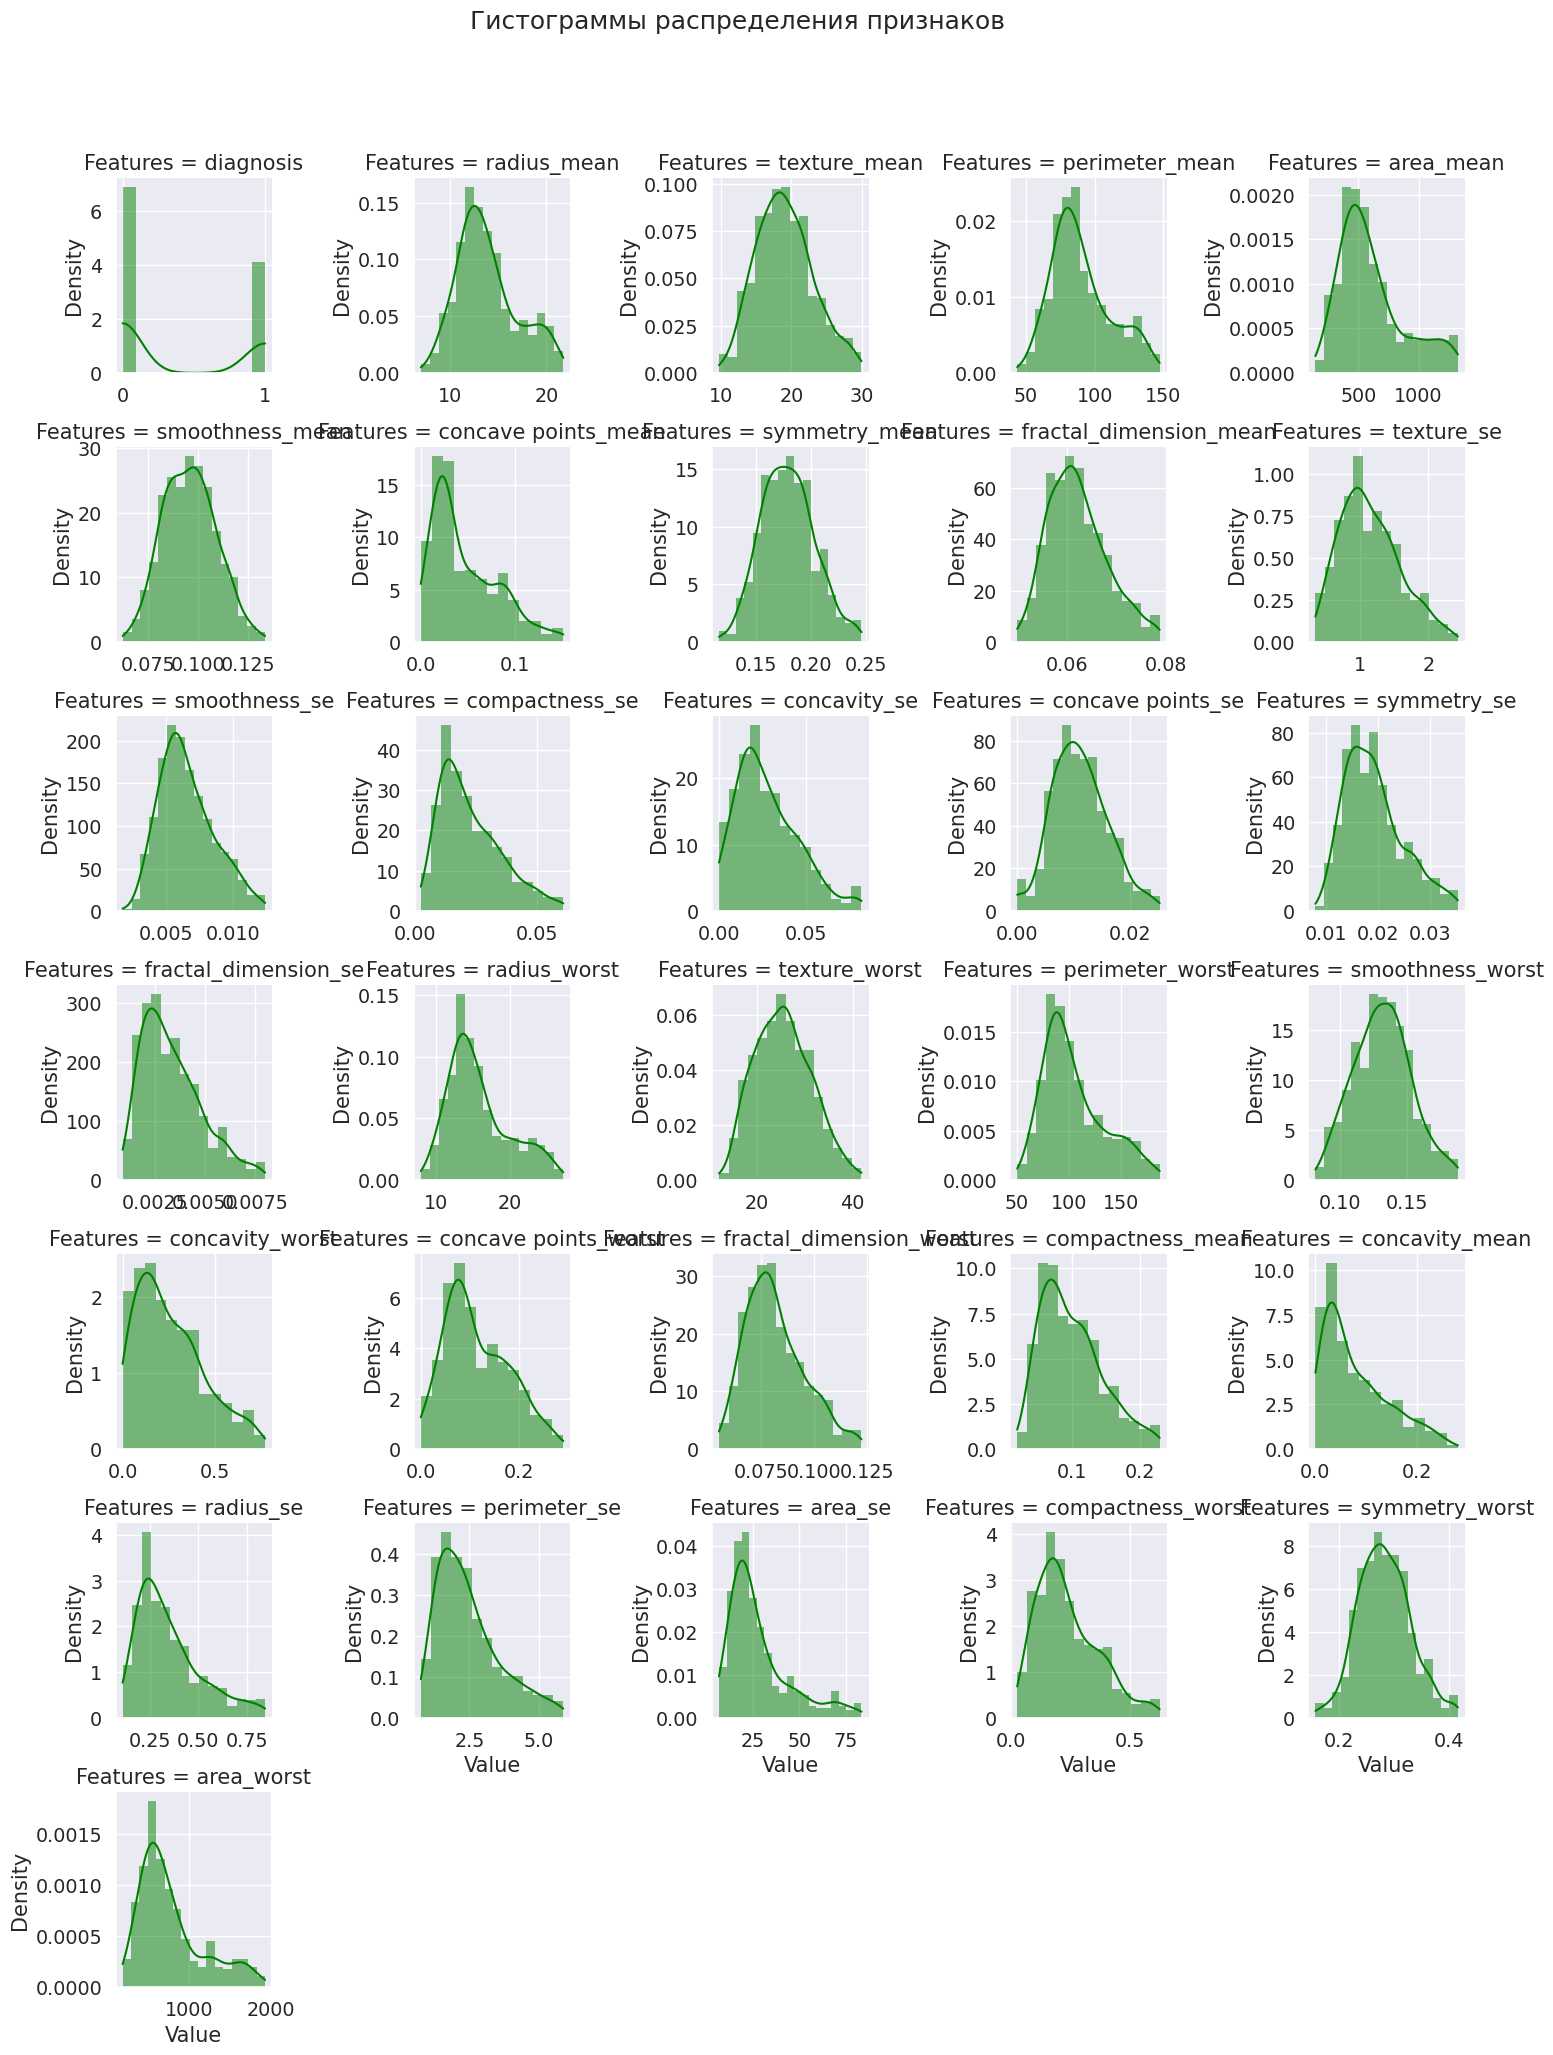

In [71]:
numeric_features = df.select_dtypes(exclude=["object","bool"])
numeric_features = numeric_features.stack().reset_index().rename(columns = {"level_1":"Features", 0 : "Value"})
ax = sns.FacetGrid(data = numeric_features, col = "Features",  col_wrap = 5, sharex = False, sharey = False)
ax = ax.map(sns.histplot, "Value", kde=True, stat="density", linewidth=0, color ='green')
plt.subplots_adjust(top = 0.9)
plt.suptitle("Гистограммы распределения признаков");

Радиус, периметр, площадь демонстрируют нам тяжелые хвосты, texture, smoothness - толстоваты, concave, compactness, многие заваливаются влево(правая ассиметрия, т. е. мода меньше медианы), в общем, распределения данных не стесняются быть ненормальными.

Для удобства разделим признаки на группы, чтобы отдельно посмотреть корреляцию внутри каждой. Понятно, что среднее и разброс будут связаны, а что с худшими значениями?

In [72]:
# Разделим на группы:
df_area = df[['diagnosis', 'area_mean', 'area_se', 'area_worst']]
df_compactness = df[['diagnosis', 'compactness_mean', 'compactness_se', 'compactness_worst']]
df_concave = df[['diagnosis', 'concave points_mean', 'concave points_se', 'concave points_worst']]
df_concavity = df[['diagnosis', 'concavity_mean', 'concavity_se', 'concavity_worst']]
df_fractal = df[['diagnosis', 'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']]
df_perimeter = df[['diagnosis', 'perimeter_mean', 'perimeter_se', 'perimeter_worst']]
df_radius = df[['diagnosis', 'radius_mean', 'radius_se', 'radius_worst']]
df_smoothness = df[['diagnosis', 'smoothness_mean', 'smoothness_se', 'smoothness_worst']]
df_symmetry = df[['diagnosis', 'symmetry_mean', 'symmetry_se', 'symmetry_worst']]
df_texture = df[['diagnosis', 'texture_mean', 'texture_se', 'texture_worst']]

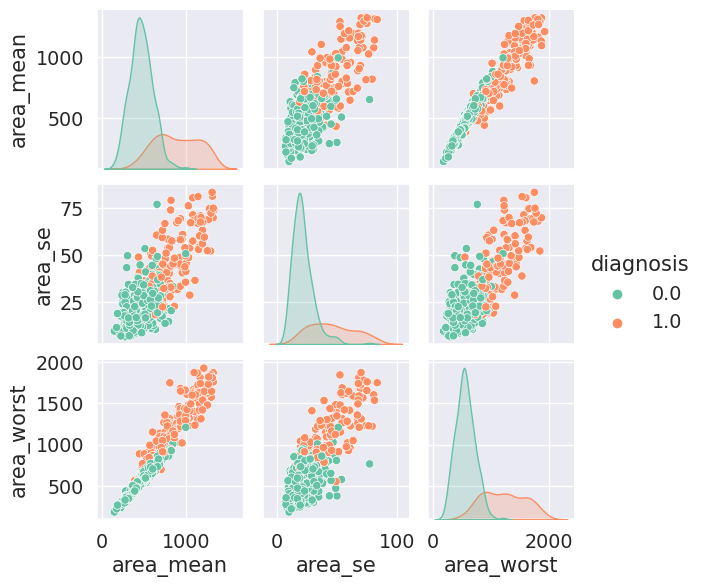

In [73]:
sns.pairplot(df_area, hue='diagnosis', height=2, palette='Set2');

Хорошая группа признаков для построения модели, поскольку замечательно видно разделение. Но между собой признаки сильно коррелируют, примем во внимание сей факт.

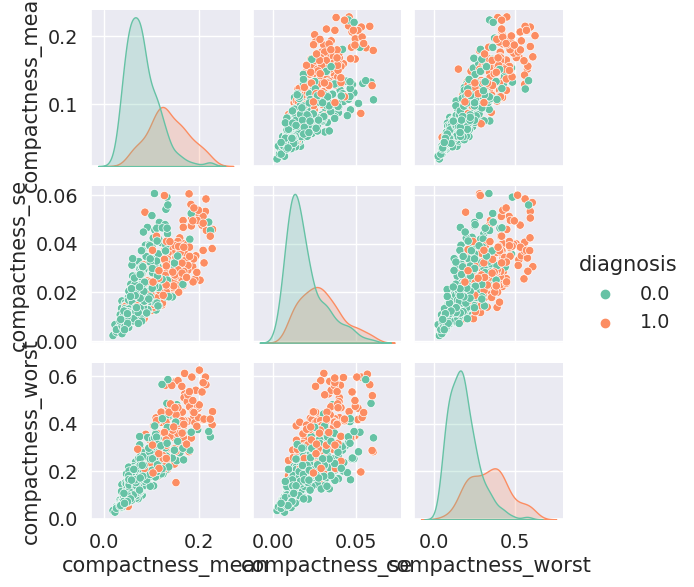

In [74]:
sns.pairplot(df_compactness, hue='diagnosis', height=2, palette='Set2');

В этой группе признаков бросается в глаза тот факт, что одна площадь накладывается на другую, то есть эта группа будет хуже отрабатывать при распознавании.

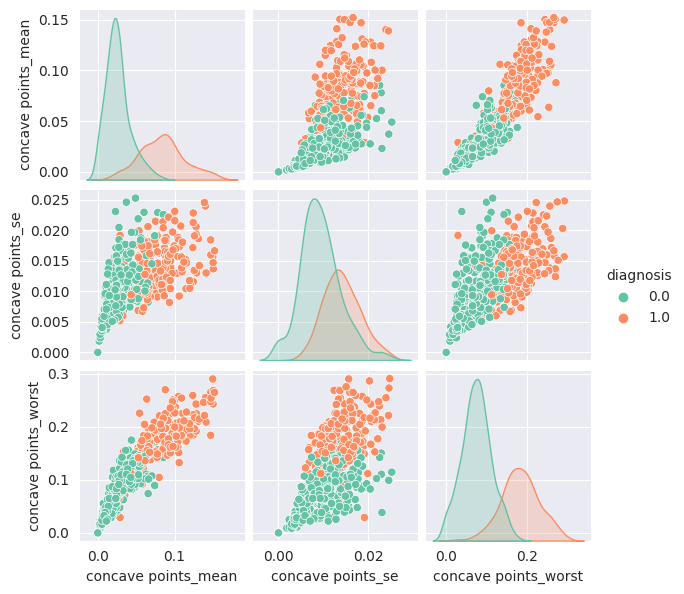

In [16]:
sns.pairplot(df_concave, hue='diagnosis', height=2, palette='Set2');

Еще одна хорошая группа для распознавания.

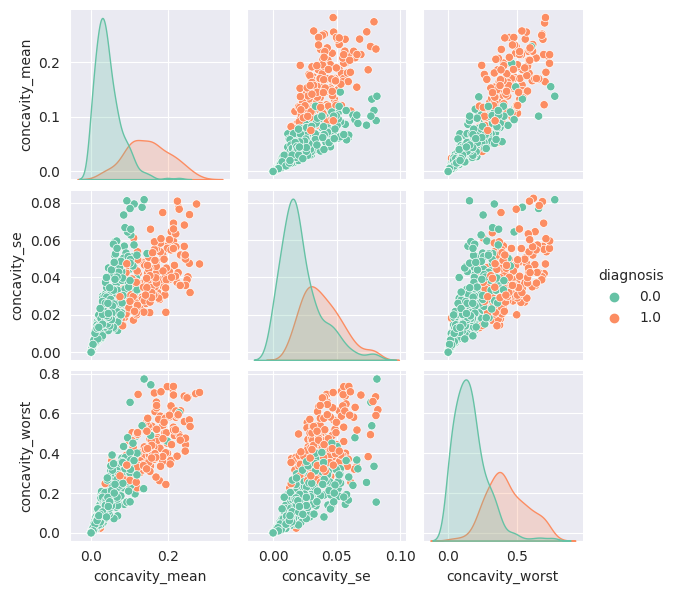

In [17]:
sns.pairplot(df_concavity, hue='diagnosis', height=2, palette='Set2');

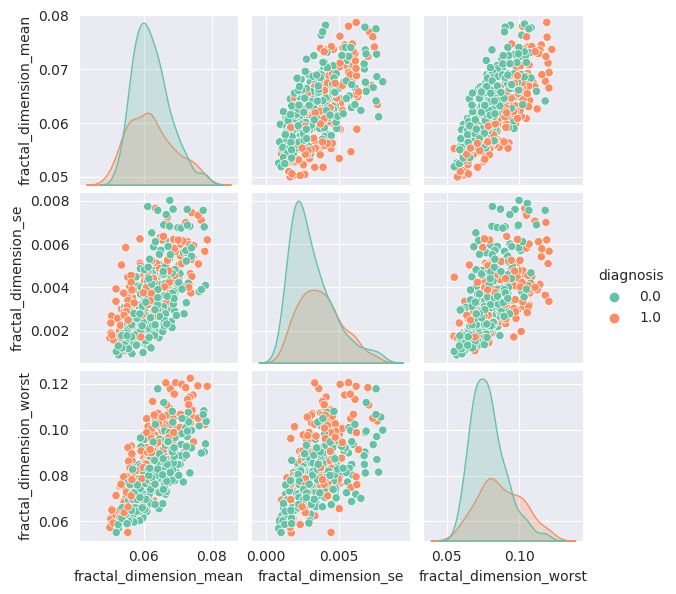

In [18]:
sns.pairplot(df_fractal, hue='diagnosis', height=2, palette='Set2');

Сразу видно, что этот признак не повлияет ни на что, можно будет проверить - и в какой-то из обучалок выкинуть его из датасета.

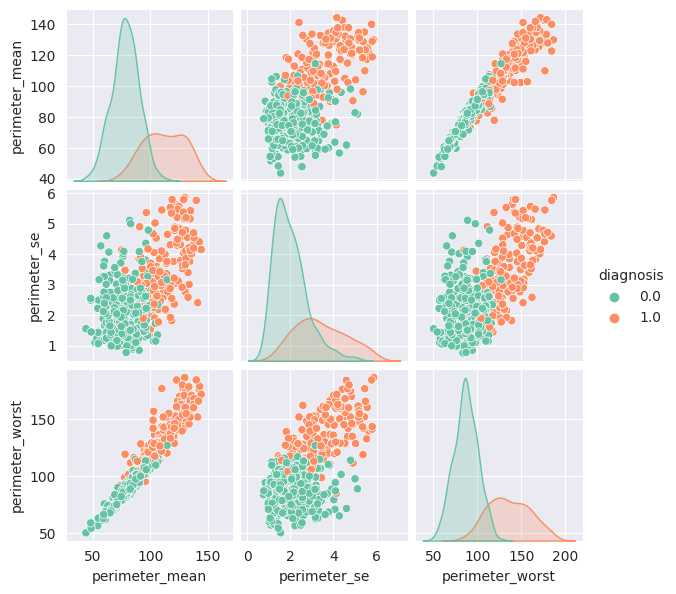

In [20]:

sns.pairplot(df_perimeter, hue='diagnosis', height=2, palette='Set2');

Тоже подойдет для прогноза.

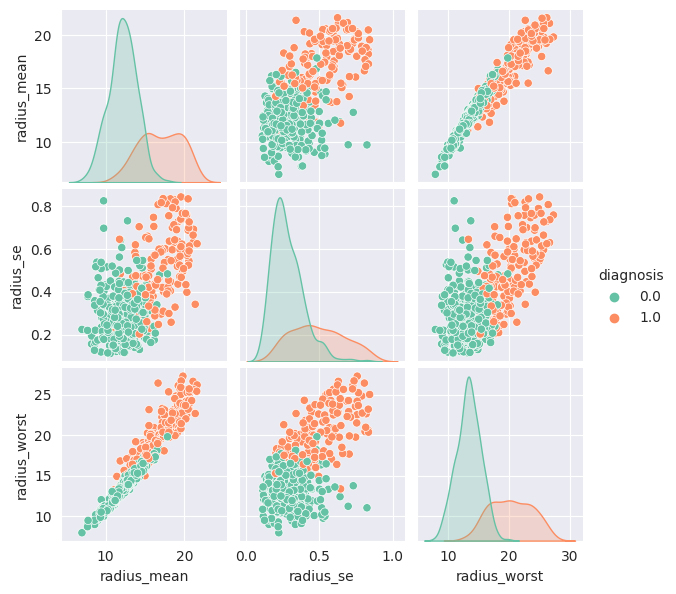

In [21]:
sns.pairplot(df_radius, hue='diagnosis', height=2, palette='Set2');

И эта группа демонстрирует заинтересованность нам помочь.

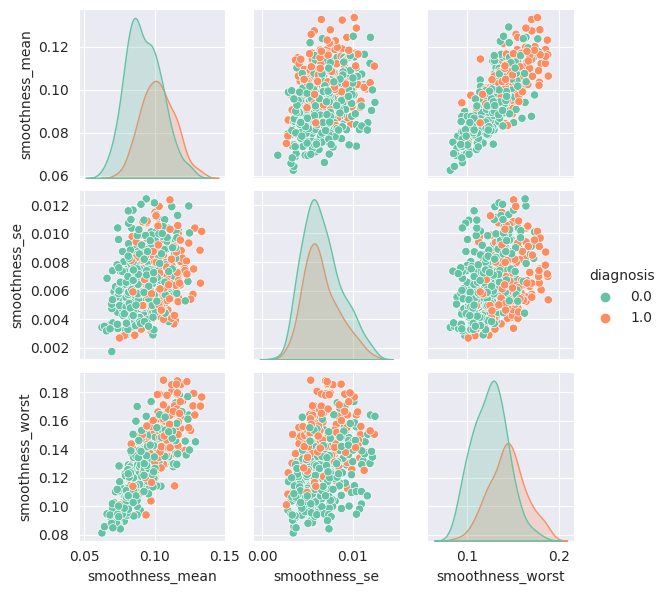

In [22]:
sns.pairplot(df_smoothness, hue='diagnosis', height=2, palette='Set2');

Отправить его туда же, куда и fractal.

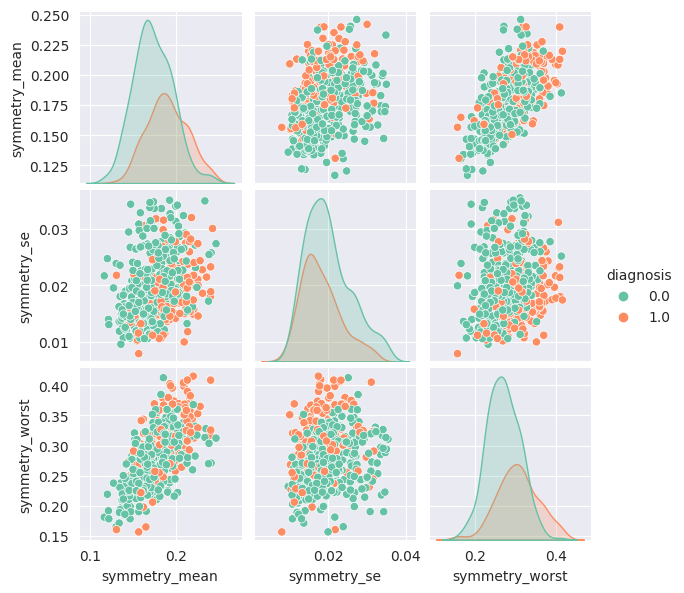

In [23]:
sns.pairplot(df_symmetry, hue='diagnosis', height=2, palette='Set2');

Эта группа нам интересна тем, что здесь присутствует вопрос к корреляции между признаками. Посмотрим на это дело поближе.

In [75]:
df_symmetry.symmetry_se.corr(df.symmetry_mean)

0.2875725117392254

In [76]:
df_symmetry.symmetry_worst.corr(df.symmetry_mean)

0.6599670205806846

In [77]:
df_symmetry.symmetry_se.corr(df.symmetry_worst)

0.19320182290042387

То есть корреляция между разбросом и средним или худшим слабая. Да и признаки сами по себе плохо разбираются - кто болен, а кто нет. Не знаю, что делать.

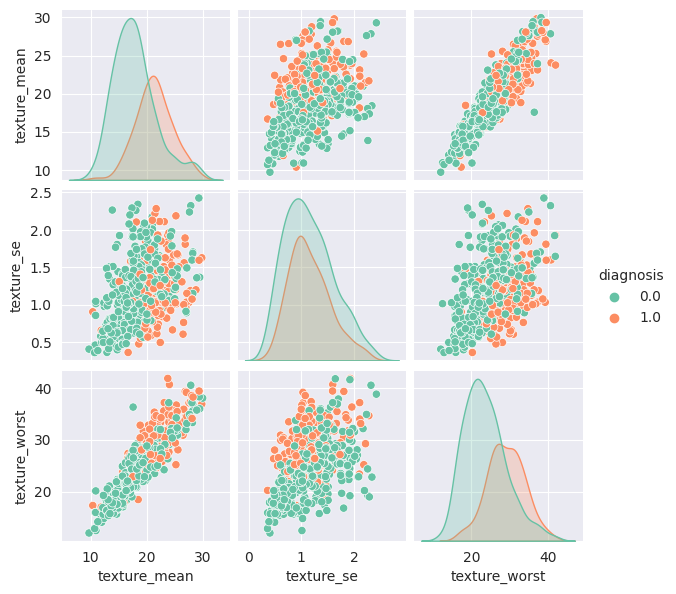

In [27]:
sns.pairplot(df_texture, hue='diagnosis', height=2, palette='Set2');

Распределения признаков этой группы в зависимости от 0 и 1 нам слабо поможет при построении модели, но неочевидная корреляция между средним текстуры и её разбросом, возможно, пригодится.

1.4. Построить heatmap для матрицы корреляций.

Для построения матрицы корреляций возьмем средние из всех групп и smoothness_se с symmetry_se и texture_se.

In [78]:
df_choose = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'symmetry_se', 'smoothness_se']
       ]
df_corr = df_choose.corr(method="spearman")

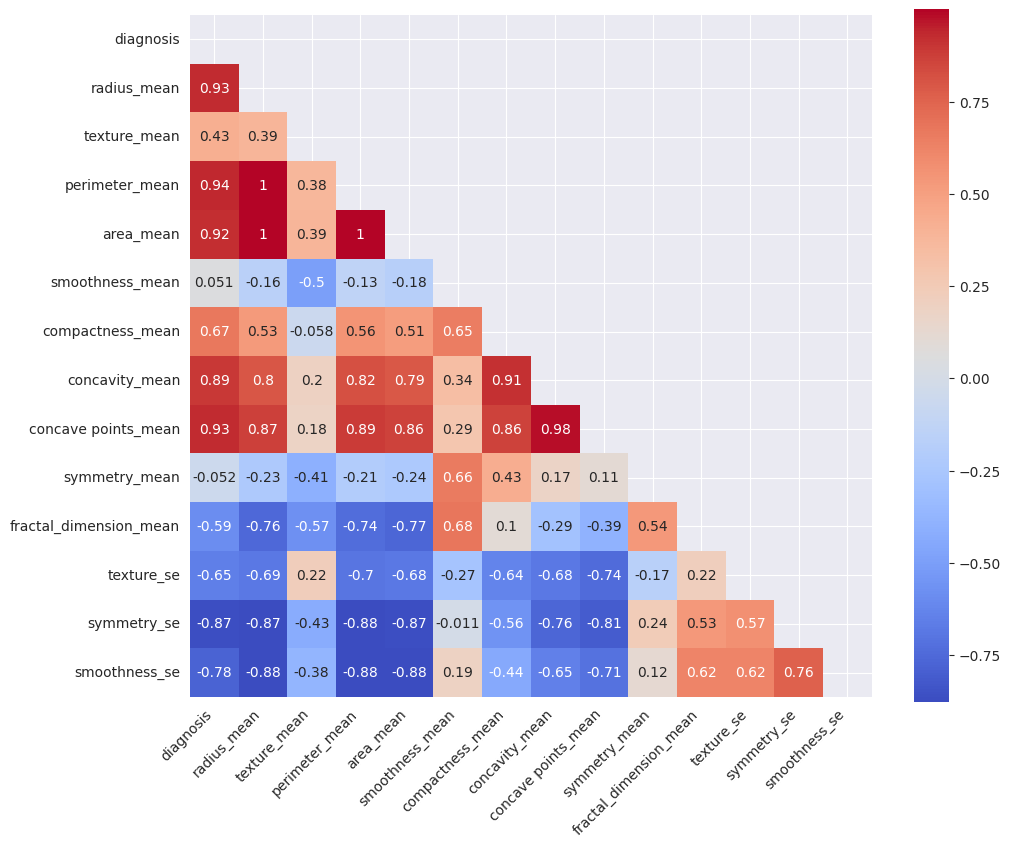

In [29]:
mask = np.triu(df_corr.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr.corr(), mask=mask, annot=True, square=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

Как мы и предполагали, на целевую переменную повлияют радиус, периметр, площадь, concave и concavity, которые также сильно коррелируют между собой, а вот симметричность не влияет ни на что, влючая целевую переменную.
Также наблюдаем сильную отрицательную корреляцию между тремя видами разбросов, добавленных нами, и средними в группах.

Уточним, правы ли мы были, отбросив часть признаков?

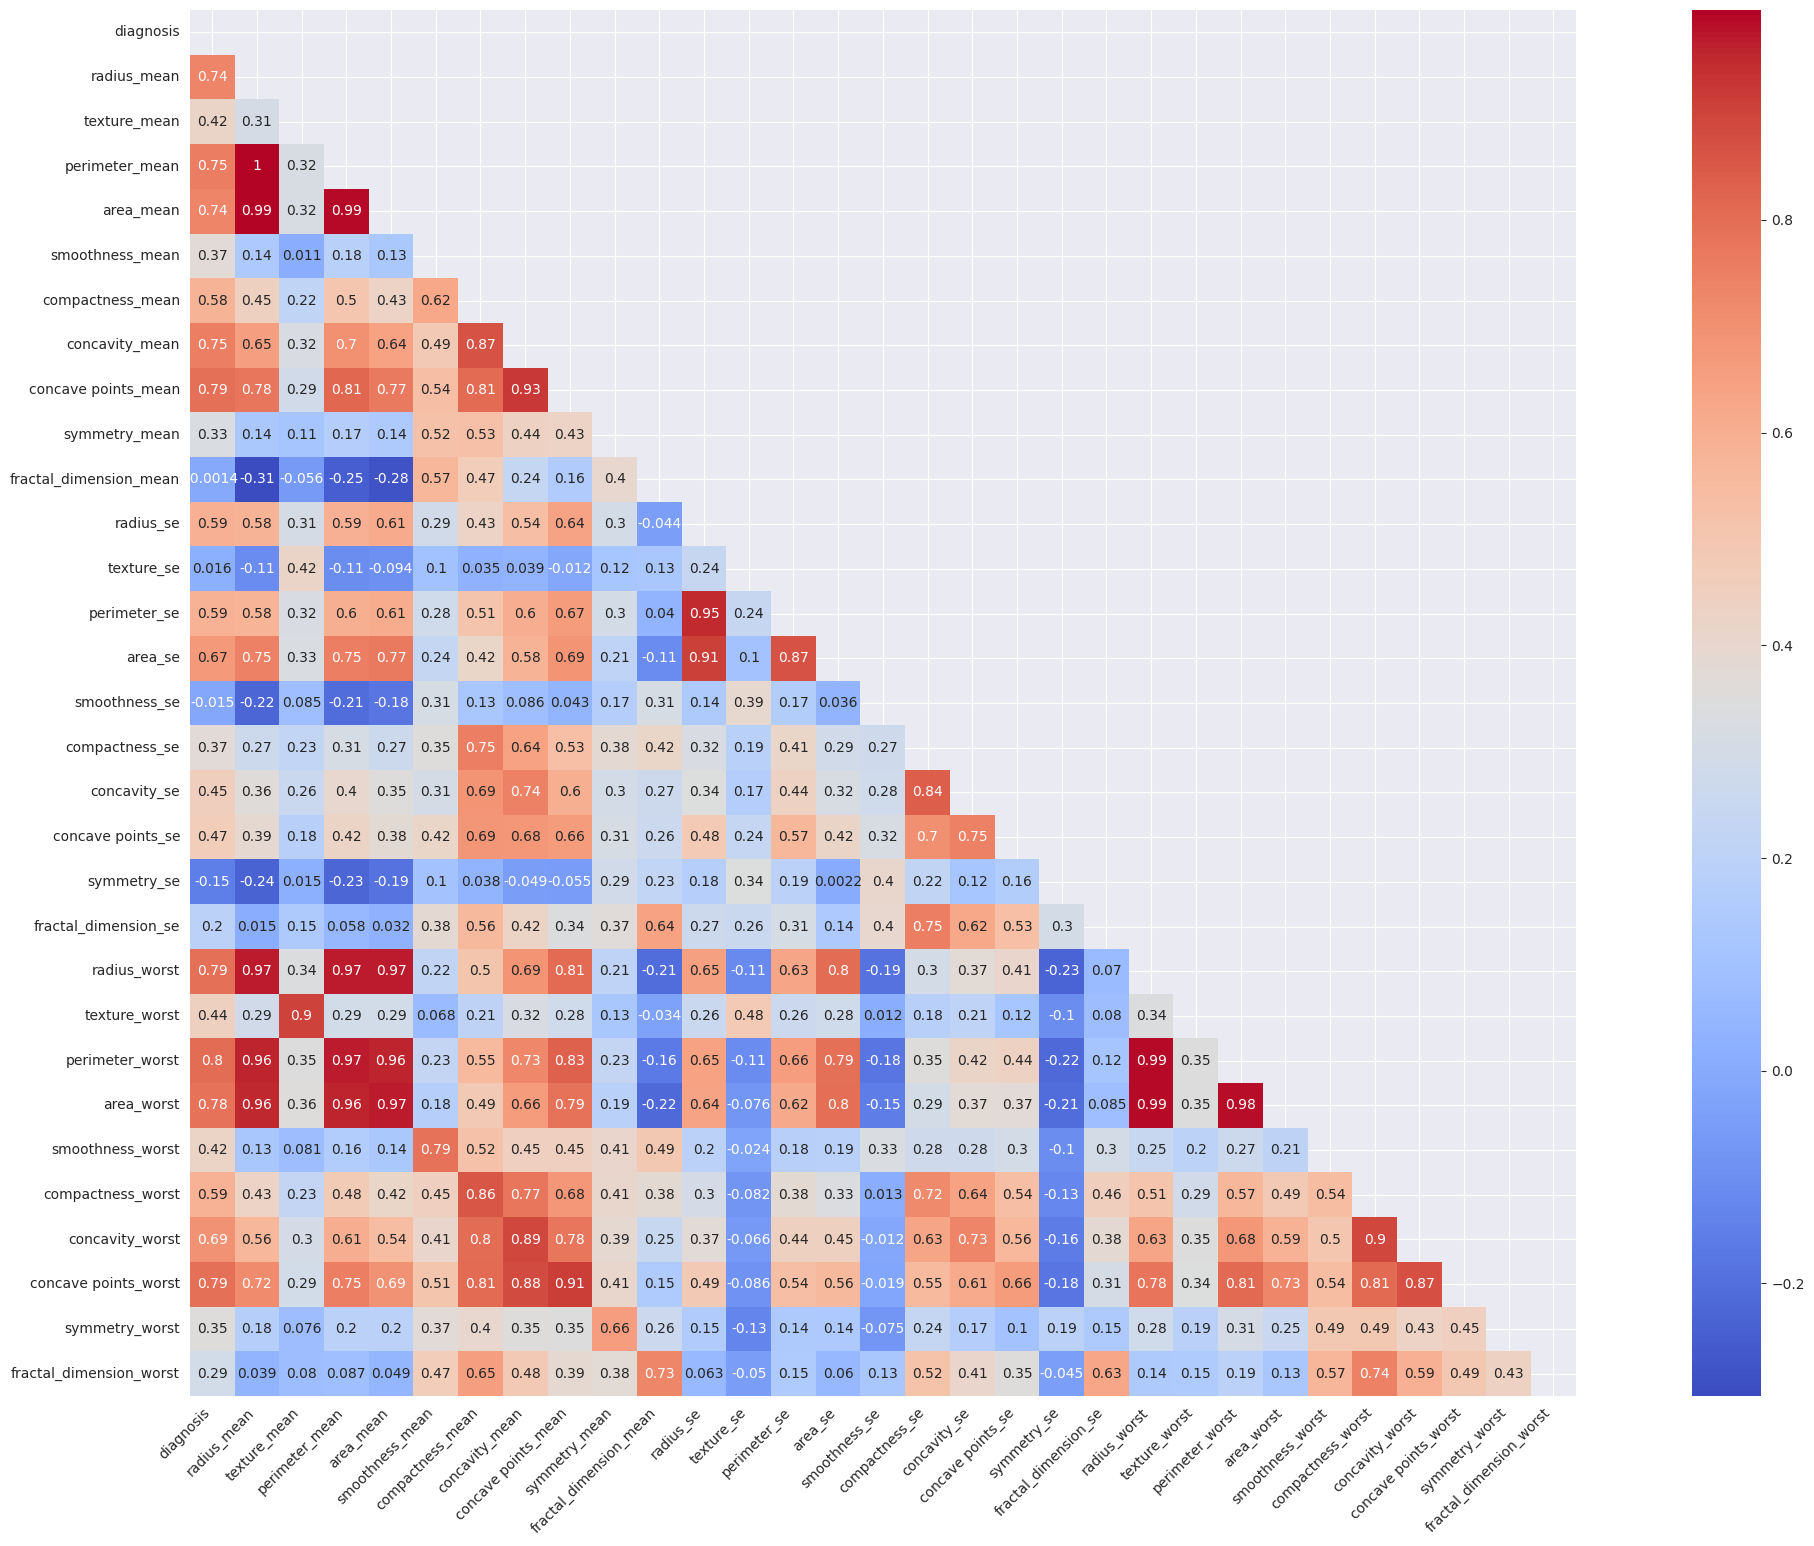

In [30]:
mask = np.triu(df.corr())
f, ax = plt.subplots(figsize=(30, 18))
sns.heatmap(df.corr(), mask=mask, annot=True, square=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

Как мы и предполагали, texture, smoothness и symmetry не коррелируют с другими признаками, но при этом не распознают целевую. Что делать?

1.5. Построим для сильно скоррелированных признаков попарные scatterplot-ы.

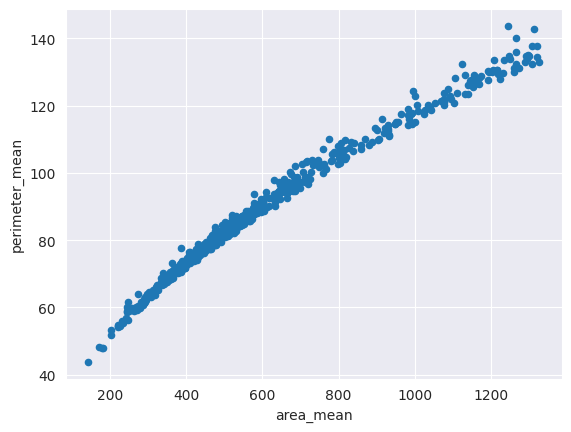

In [31]:
df.plot.scatter(x='area_mean', y='perimeter_mean');

Ну конечно! Площадь будет зависеть от периметра, как корень квадратный.

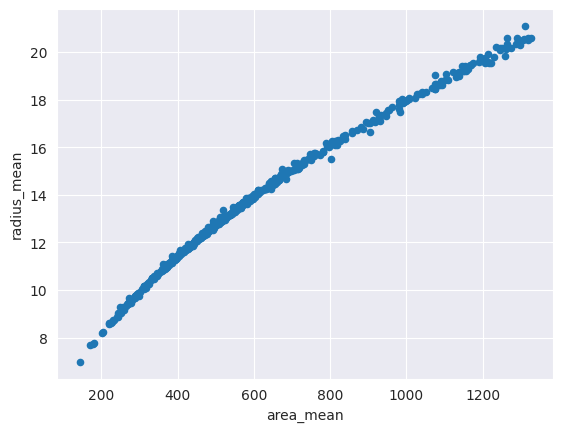

In [32]:
df.plot.scatter(x='area_mean', y='radius_mean');

Такая же история с площадью и радиусом.

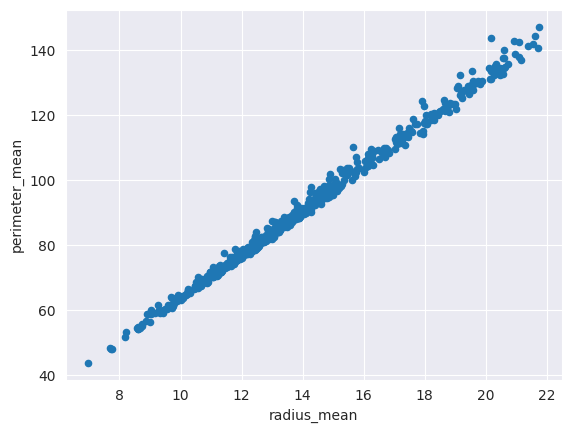

In [33]:
df.plot.scatter(x='radius_mean', y='perimeter_mean');

А вот здесь зависимость строго линейная, коэффициент прямой - на глазок - 0.8.

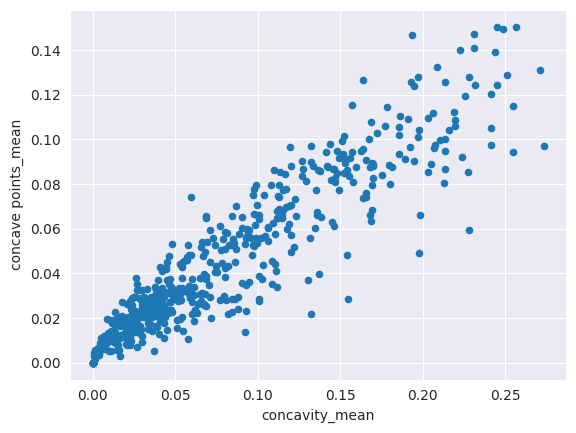

In [34]:
df.plot.scatter(x='concavity_mean', y='concave points_mean');

не знаю - кто это, но они стремятся зависеть друг от друга.

In [ ]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(df_choose, alpha=0.2, figsize=(16, 16), diagonal='kde');

Посмотрим на важность признаков (заодно проверим свои предположения).

In [84]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
#df.isnull().sum()

In [85]:
# UNIVARIATE FEATURE SELECTION
# drop target columns
drop_cols=['diagnosis']
X = df.drop(drop_cols, axis = 1) # X = independent columns (potential predictors)
y = df['diagnosis'] # y = target column (what we want to predict)
# instantiate SelectKBest to determine the best features
best_features = SelectKBest(score_func=f_regression, k=10)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(30,'Score'))  # print the best features

               Feature_Name       Score
27     concave points_worst  964.385393
22          perimeter_worst  897.944219
7       concave points_mean  861.676020
20             radius_worst  860.781707
2            perimeter_mean  697.235272
23               area_worst  661.600206
0               radius_mean  646.981021
3                 area_mean  573.060747
6            concavity_mean  533.793126
26          concavity_worst  436.691939
5          compactness_mean  313.233079
25        compactness_worst  304.341063
10                radius_se  268.840327
12             perimeter_se  253.897392
13                  area_se  243.651586
21            texture_worst  149.596905
24         smoothness_worst  122.472880
28           symmetry_worst  118.860232
1              texture_mean  118.096059
17        concave points_se  113.262760
4           smoothness_mean   83.651123
8             symmetry_mean   69.527444
29  fractal_dimension_worst   66.443961
15           compactness_se   53.247339


Возможно, что выбросы очень для нас важны в предсказании результата.

Построим матрицу корреляций для важных признаков.

In [86]:
k = 5 
corrmat = df.corr()
cols = corrmat.nlargest(k, 'diagnosis')['diagnosis'].index.tolist()
cols

['diagnosis',
 'concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst']

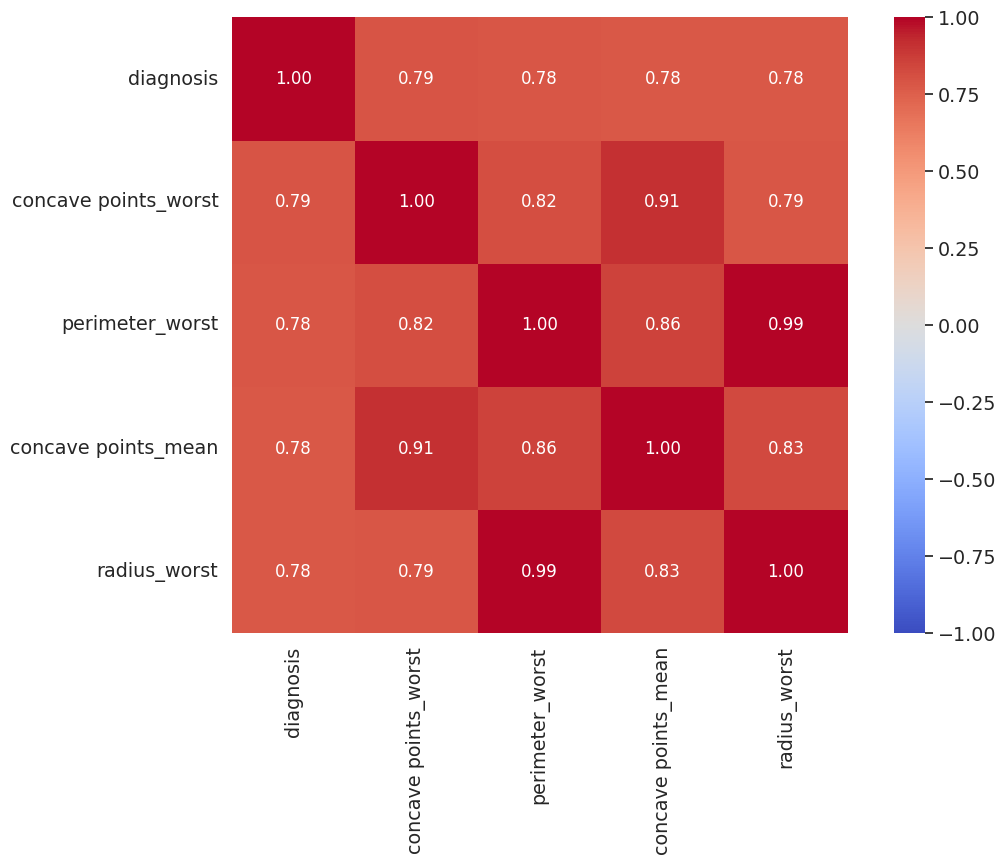

In [87]:
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(12,8))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

Всё красным-красно: признаки друг на друга влияют и зависят. Также сильная корреляция с целевой переменной, а это не может не радовать.

1.6. Боксплоты.

Разобьем переменную perimeter_worst на бины, сгруппируем по целевой переменной и посмотрим на concave_points_worst.

In [43]:

perimeter=df.perimeter_worst.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
perimeter

0.0     50.410
0.1     72.178
0.2     81.402
0.3     86.328
0.4     91.304
0.5     97.660
0.6    105.740
0.7    115.900
0.8    133.500
0.9    157.740
1.0    251.200
Name: perimeter_worst, dtype: float64

In [44]:
df['perimeter'] = pd.cut(df['perimeter_worst'], perimeter, \
                             labels=['0-0.1', '0.1-0.2', '0.2-0.3','0.3-0.4','0.4-0.5',\
                                     '0.5-0.6', '0.6-0.7', '0.7-0.8',\
                                     '0.8-0.9', '0.9-1'], right=True, include_lowest=True)

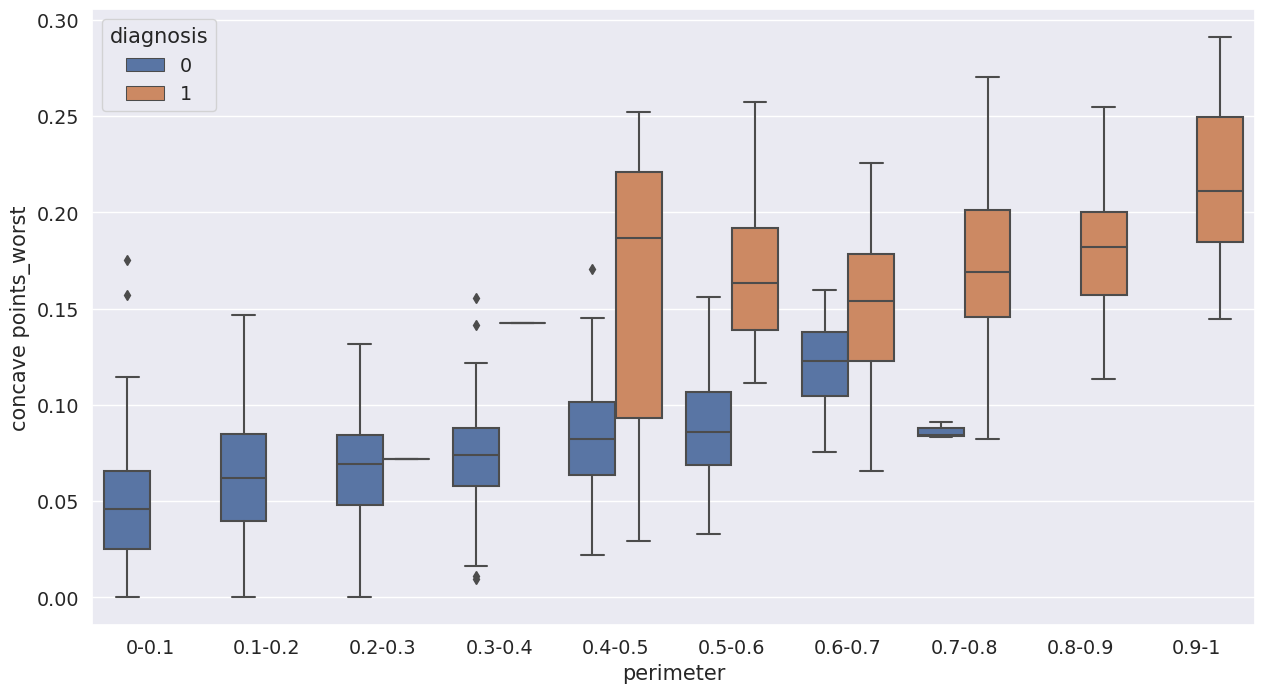

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, y='concave points_worst', x='perimeter', hue='diagnosis');

Несмотря на сильную корреляцию, эти признаки помогут нам отличить больного человека от здорового.

Но поскольку автор работы имеет предубеждение против боксплотов, то позволит себе посмотреть на взаимосвязь сильно коррелирующих признаков с помощью иных инструментов сиборна.

<Figure size 1500x800 with 0 Axes>

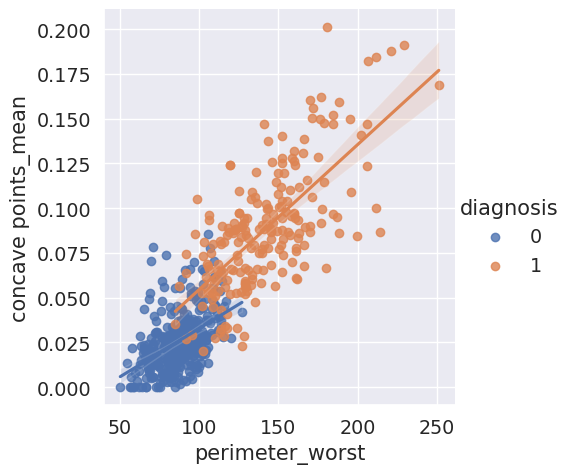

In [46]:
plt.figure(figsize=(15,8))
sns.lmplot(x='perimeter_worst', y='concave points_mean', hue='diagnosis', data=df);

Отлично видно разделение на группы. Радует.

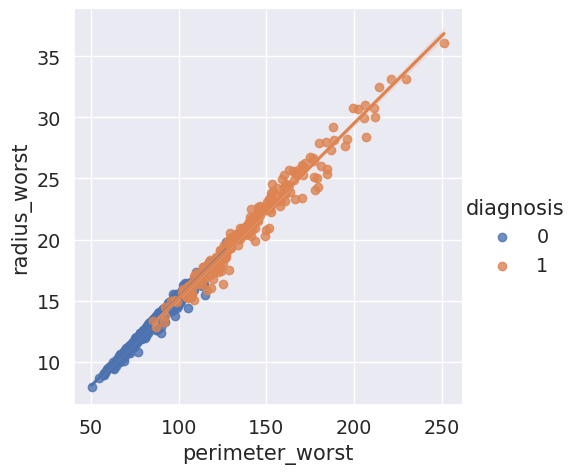

In [47]:
sns.lmplot(x="perimeter_worst", y="radius_worst", hue="diagnosis", data=df);

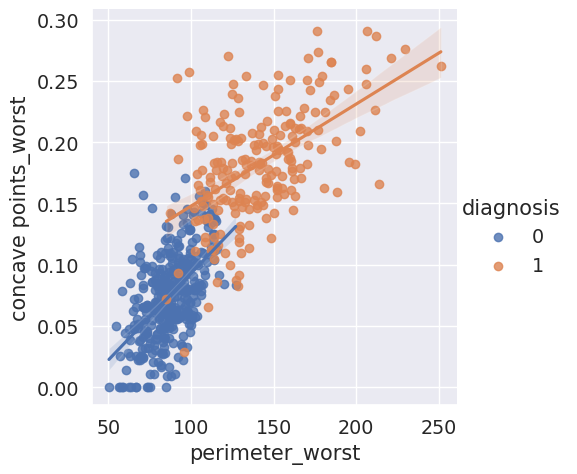

In [48]:
sns.lmplot(x="perimeter_worst", y="concave points_worst", hue="diagnosis", data=df);

И тут красота сплошная.

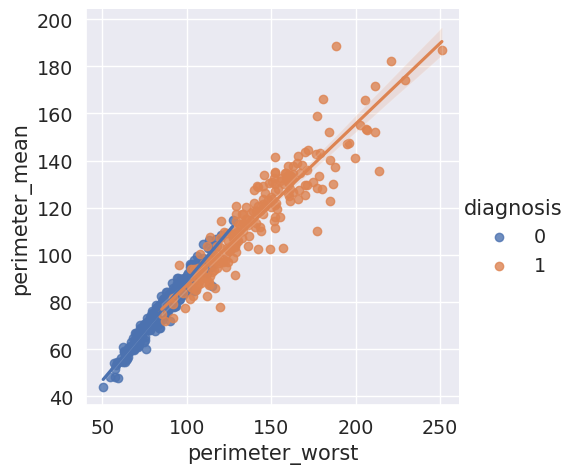

In [49]:
sns.lmplot(x="perimeter_worst", y="perimeter_mean", hue="diagnosis", data=df);

Также можно полюбоваться на признаки с помощью иных средств визуализации:

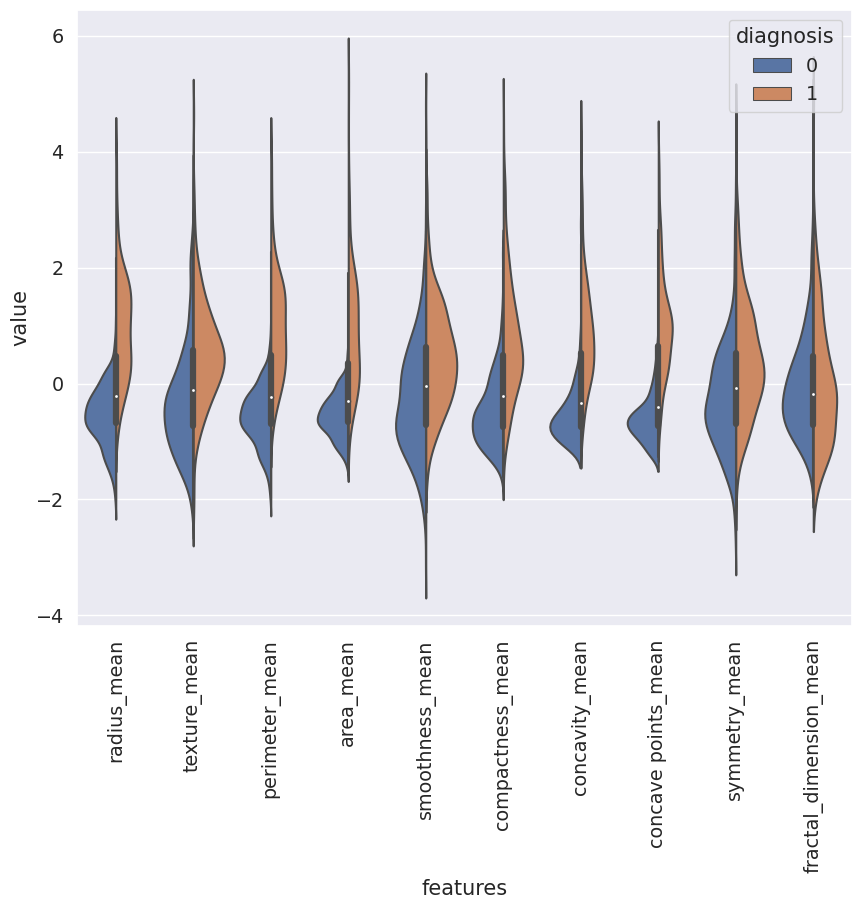

In [56]:
X = (X - X.mean())/X.std()
df = pd.concat([y,X.iloc[:,0:10]],axis=1)
df = pd.melt(df,id_vars='diagnosis',
                    var_name='features',
                    value_name='value')
plt.figure(figsize=(10,8))
sns.violinplot(data = df, x='features', y='value', hue='diagnosis',split=True)
plt.xticks(rotation=90)
plt.show()

Тут красиво видно, как concave points_mean отличает больных от здоровых, а, например, smoothness, вообще, в тему не вникает.

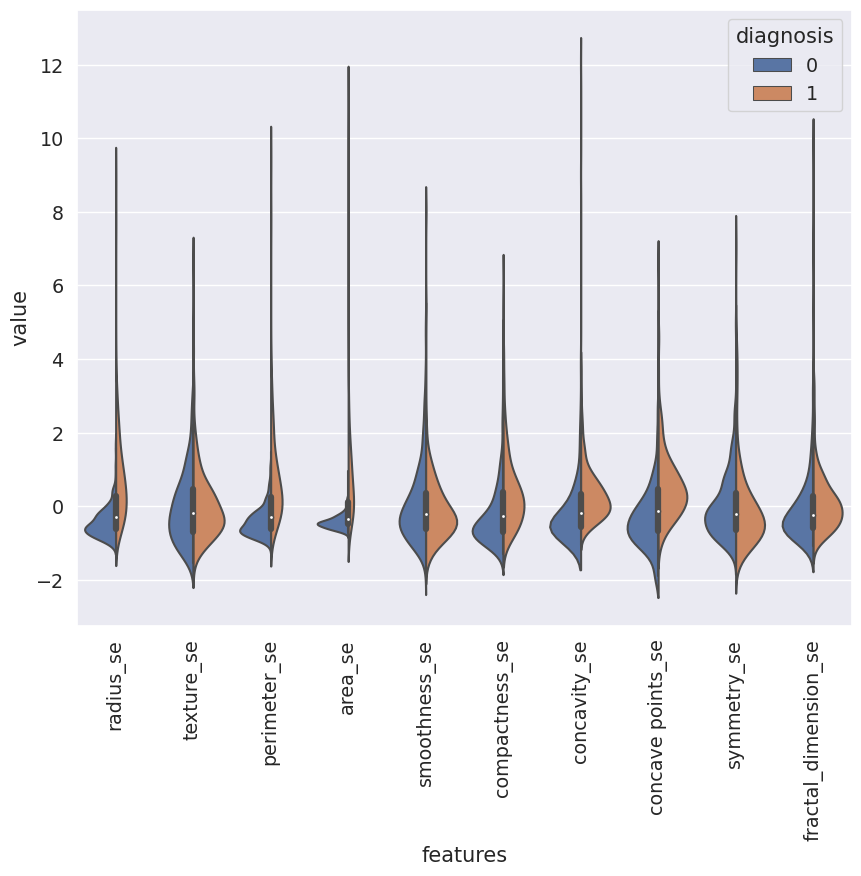

In [57]:
df = pd.concat([y,X.iloc[:,10:20]],axis=1)
df = pd.melt(df,id_vars='diagnosis',
                    var_name='features',
                    value_name='value')
plt.figure(figsize=(10,8))
sns.violinplot(data = df, x='features', y='value', hue='diagnosis',split=True)
plt.xticks(rotation=90)
plt.show()

На картинке хорошо видно, что наше предположение о том, что smoothness_se, symmetry_se и texture_se подтвердилось. Зато площадь хороша.

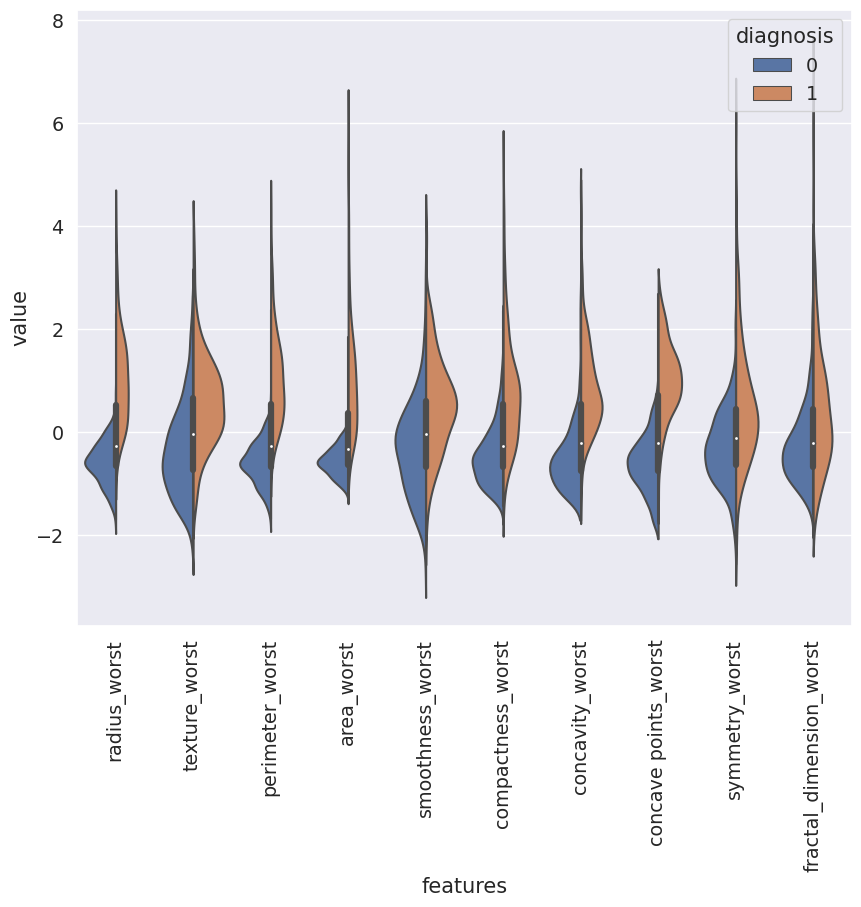

In [58]:
df = pd.concat([y,X.iloc[:,20:30]],axis=1)
df = pd.melt(df,id_vars='diagnosis',
                    var_name='features',
                    value_name='value')
plt.figure(figsize=(10,8))
sns.violinplot(data = df, x='features', y='value', hue='diagnosis',split=True)
plt.xticks(rotation=90)
plt.show()

Тут картина тоже ясна.

Таким образом делаем следующие выводы:

- многие признаки имеют сильную корреляцию между собой;

- очень большое количество выбросов, но пока не представляю - стоит ли их гасить, поскольку есть подозрение, что, например, выбросы в распределении периметра могут быть нормальными значениями для perimeter_worst, и мне не убедить себя, что это разные признаки;

- ряд признаков не влияют на целевую переменную;

- данные несбалансированы.

Пойдем строить модель kNN, поскольку:

- этот алгоритм не зависит от предположений о распределении данных, поэтому он может использоваться для различных типов, включая сильно скоррелированные;
- при использовании kNN для классификации данных, он основывается на близости объектов друг к другу в пространстве признаков, а не на их корреляции, то есть kNN может работать хорошо даже в случае сильной корреляции между признаками, так как он использует только те признаки, которые наиболее полезны для классификации;
- kNN является непараметрическим алгоритмом, то есть он не требует определения параметров распределения данных и может быть применен к данным любого типа.

In [59]:
df.to_csv('set.csv', index=False)